# House Price Prediction Stack Model using KNN classification and Muti Variable Linear regression

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from geopy import Nominatim

In [2]:

from IPython.display import display

In [3]:
df = pd.read_csv("/content/housing_data_assgn_3_with_category.csv")

In [4]:
df.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,sqrt_ft,garage,fireplaces,HOA,toal_kit_features,toal_flooring,rooms,house_age,sold_price_scaled,price_per_sf,cat
0,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,10500.0,0.0,6.0,0.0,4,2,23.0,82,1.000000,504.761905,5
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,7300.0,0.0,5.0,0.0,2,2,4.0,26,0.785617,575.342466,4
2,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,9019.0,4.0,4.0,0.0,4,3,12.0,93,0.844085,498.946668,6
3,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,6396.0,3.0,5.0,55.0,5,2,10.0,28,0.631933,533.372420,5
4,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,6842.0,3.0,5.0,422.0,5,3,7.0,24,0.600468,475.007308,6


In [5]:
df.shape

(4905, 18)

In [6]:
import random

def train_test_split(data, test_ratio):
    # Shuffle the data randomly
    data = data.sample(frac=1).reset_index(drop=True)

    # Calculate the index to split the data into train and test sets
    split_index = int(len(data) * (1 - test_ratio))

    # Split the data into train and test sets
    train_data = data.iloc[:split_index]
    test_data = data.iloc[split_index:]

    return train_data, test_data



In [7]:
train_set, test_set = train_test_split(data = df, test_ratio = 0.2)

In [8]:
train_set.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,sqrt_ft,garage,fireplaces,HOA,toal_kit_features,toal_flooring,rooms,house_age,sold_price_scaled,price_per_sf,cat
0,625000.0,85750,-110.843825,32.324219,0.25,5288.00,1996,2936.0,2.0,1.0,122.00,5,2,7.0,27,0.088872,212.874659,11
1,1900000.0,85718,-110.928038,32.339499,4.21,15042.50,1981,5138.0,5.0,4.0,83.33,10,2,7.0,42,0.337361,369.793694,8
2,535000.0,85749,-110.771050,32.273170,1.86,4490.13,1999,3614.0,3.0,2.0,58.00,4,2,7.0,24,0.071331,148.035418,13
3,680000.0,85718,-110.917178,32.312064,1.00,5750.54,1994,2665.0,3.0,1.0,195.00,11,1,7.0,29,0.099591,255.159475,10
4,800000.0,85718,-110.920262,32.297649,1.02,6556.00,1994,3415.0,3.0,2.0,133.00,5,1,8.0,29,0.122978,234.260615,11


In [9]:
train_set.shape

(3924, 18)

In [10]:
test_set.shape

(981, 18)

In [11]:

X_train = train_set[['longitude','latitude','lot_acres','house_age','sqrt_ft','rooms']]

In [12]:
X_train.shape

(3924, 6)

In [13]:
X_train = X_train.to_numpy()

In [14]:
X_train

array([[-1.10843825e+02,  3.23242190e+01,  2.50000000e-01,
         2.70000000e+01,  2.93600000e+03,  7.00000000e+00],
       [-1.10928038e+02,  3.23394990e+01,  4.21000000e+00,
         4.20000000e+01,  5.13800000e+03,  7.00000000e+00],
       [-1.10771050e+02,  3.22731700e+01,  1.86000000e+00,
         2.40000000e+01,  3.61400000e+03,  7.00000000e+00],
       ...,
       [-1.10973746e+02,  3.23866030e+01,  1.37000000e+00,
         3.80000000e+01,  2.59100000e+03,  6.00000000e+00],
       [-1.10890012e+02,  3.23023960e+01,  1.83000000e+00,
         1.80000000e+01,  4.51300000e+03,  8.00000000e+00],
       [-1.10965906e+02,  3.22153700e+01,  1.90000000e-01,
         1.01000000e+02,  2.50400000e+03,  7.00000000e+00]])

In [15]:
X_train.shape

(3924, 6)

In [16]:
y_train = train_set['cat']

In [17]:
y_train = y_train.to_numpy()

In [18]:
y_train.shape

(3924,)

In [19]:
y_train

array([11,  8, 13, ..., 11, 11, 10])

In [20]:
X_test = test_set[['longitude','latitude','lot_acres','house_age','sqrt_ft','rooms']]
X_test = X_test.to_numpy()

In [21]:
X_test.shape

(981, 6)

In [22]:
y_test = test_set['cat']
y_test = y_test.to_numpy()

In [23]:
np.unique(y_test)

array([ 3,  4,  5,  6,  8,  9, 10, 11, 12, 13])

In [24]:
y_test.shape

(981,)

# KNN Classification

In [25]:
class KNNClassifier():

  def fit(self, X, y):
    self.X=X
    self.y=y

  def predict(self,X, K, epsilon = 1e-3):

    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K] # sort the dist (indexes) upto K no.of values
      gamma_k = 1/(np.sqrt(dist2[idxt] + epsilon))

      y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()

    return y_hat


In [26]:
# Define Accuracy
def accuracy(y,y_hat):
  return np.mean(y == y_hat)

In [27]:
X_train.shape

(3924, 6)

In [28]:
knn = KNNClassifier()
knn.fit(X_train,y_train)

In [29]:
y_hat = knn.predict(X_train, 7)

In [30]:
accuracy(y_train, y_hat)

0.9867482161060143

In [31]:
y_hat = knn.predict(X_train, 7)
accuracy(y_train, y_hat)

0.9867482161060143

In [32]:
y_hat = knn.predict(X_train, 10)
accuracy(y_train, y_hat)

0.9857288481141692

In [33]:
y_hat = knn.predict(X_train, 20)
accuracy(y_train, y_hat)

0.985474006116208

In [34]:
y_hat = knn.predict(X_train, 30)
accuracy(y_train, y_hat)

0.985474006116208

In [35]:
y_hat = knn.predict(X_train, 50)
accuracy(y_train, y_hat)

0.9852191641182467

In [36]:
y_hat = knn.predict(X_test, 30)

In [37]:
np.unique(y_hat)

array([ 4.,  8.,  9., 10., 11., 12., 13.])

In [38]:
accuracy(y_test, y_hat)

0.4841997961264016

In [39]:
y_hat = knn.predict(X_test, 7)
accuracy(y_test, y_hat)

0.46075433231396534

In [40]:
y_hat = knn.predict(X_test, 10)
accuracy(y_test, y_hat)

0.47706422018348627

In [41]:
y_hat = knn.predict(X_test, 20)
accuracy(y_test, y_hat)

0.46992864424057085

In [42]:
y_hat = knn.predict(X_test, 50)
accuracy(y_test, y_hat)

0.49133537206931704

# Multi Variate Linear Regression

In [43]:
def OLS(Y, Y_hat,N):
  #N = len(Y)
  return (1/(2*N)*np.sum((Y-Y_hat)**2))

In [44]:
# Multi variate linear regression
class MVLinearRegression():
  def fit(self, X,y, eta = 1e-3, epochs =1e3, show_curve = False):
    epochs =int(epochs)
    N, D = X.shape
    Y =y

    #Initialize the weights
    self.W =np.random.randn(D)

    J = np.zeros(epochs)

    for epoch in range(epochs):
      Y_hat = self.predict(X)
      J[epoch] = OLS(Y, Y_hat, N)
      #weight update Rule:
      self.W = self.W - eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()


  def predict(self,X):
    return X @ self.W

In [45]:
class MVlinearRegression():

  def fit(self, X, y, eta = 1e-3, epochs= 1e3, show_curve = False):
    epochs = int(epochs)
    N, D = X.shape
    Y= y
    # SGD Cycle, Initialize the weights
    self.W = np.random.rand(D)
    J = np.zeros(epochs)
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      J[epoch] = OLS(Y, Y_hat,)
      self.W -= eta*(1/N)*(X.T@(Y_hat - Y)) # Gradient

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()
  def predict(self,X):
    return X@self.W

In [46]:
#RMSE
def RMSE(Y, Y_hat):
    n = len(Y)
    sq_err = (Y - Y_hat) ** 2
    mse = np.sum(sq_err) / n
    rmse = np.sqrt(mse)

    return rmse

In [47]:
# R-Squred
def R2(Y, Y_hat):
  return(1-(np.sum((Y - Y_hat)**2))/np.sum((Y-np.mean(Y))**2))

In [48]:
X_train = train_set[['longitude','latitude','lot_acres','house_age','sqrt_ft','rooms','cat']]
X_train = X_train.to_numpy()
X_train.shape

(3924, 7)

In [49]:
y_train = train_set['sold_price']
y_train = y_train.to_numpy()
y_train.shape

(3924,)

In [50]:
X_test = test_set[['longitude','latitude','lot_acres','house_age','sqrt_ft','rooms','cat']]
X_test = X_test.to_numpy()
X_test.shape

(981, 7)

In [51]:
y_test = test_set['sold_price']
y_test = y_test.to_numpy()
y_test.shape

(981,)

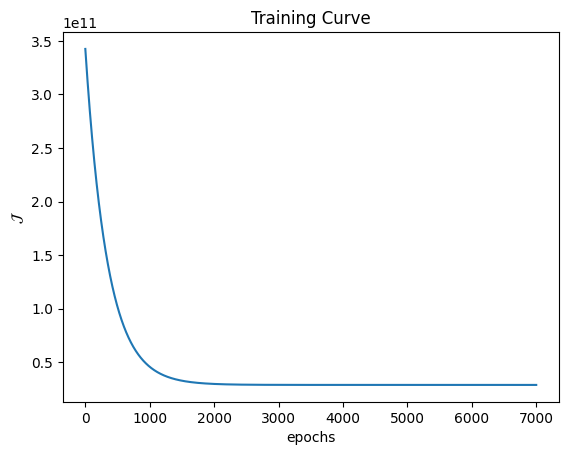

In [52]:

mvlr = MVLinearRegression()
mvlr.fit(X_train,y_train,epochs=7000, eta = 1e-10,show_curve= True)
y_hat = mvlr.predict(X_train)

In [53]:
RMSE(y_train, y_hat)

240519.42245515942

In [54]:
R2(y_train, y_hat)

0.3859761363602404

In [55]:
total_residuals = y_train - y_hat

Text(0, 0.5, 'Residuals of training set')

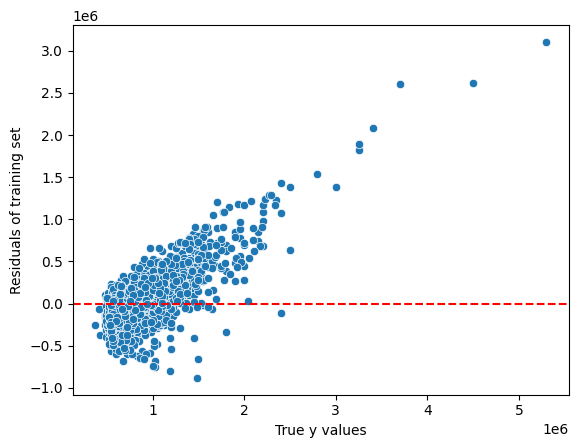

In [56]:
# Ploting total residuals for training
sns.scatterplot(x= y_train, y= total_residuals)
plt.axhline(y=0, color = 'r', ls = '--')
plt.xlabel("True y values")
plt.ylabel("Residuals of training set")

In [57]:
y_hat

array([ 612644.37445746, 1071540.46844067,  753934.13365766, ...,
        540764.0911587 ,  941270.35782676,  522683.32497228])

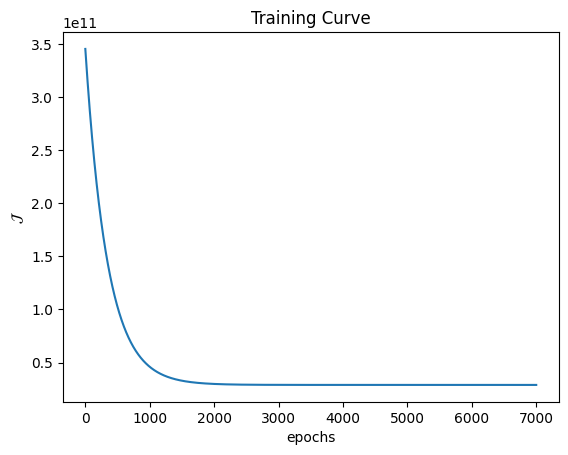

In [58]:

mvlr = MVLinearRegression()
mvlr.fit(X_train,y_train,epochs=7000, eta = 1e-10,show_curve= True)
y_hat = mvlr.predict(X_test)

In [59]:
RMSE(y_test, y_hat)

247880.33022417285

In [60]:
R2(y_test, y_hat)

0.33685005679094016

Text(0, 0.5, 'Residuals of test set')

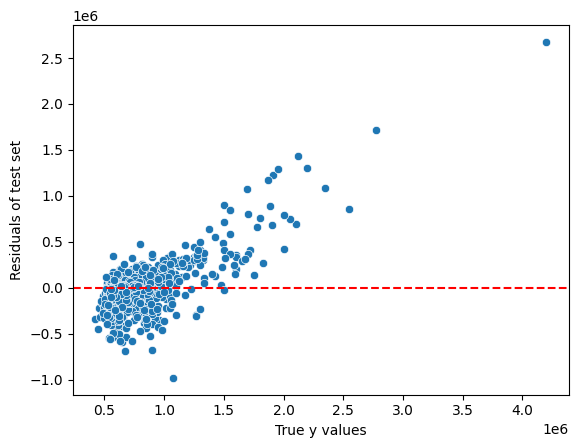

In [61]:
# Ploting total residuals for test set
total_residuals = y_test - y_hat

sns.scatterplot(x= y_test, y= total_residuals)
plt.axhline(y=0, color = 'r', ls = '--')
plt.xlabel("True y values")
plt.ylabel("Residuals of test set")


In [62]:
#['longitude','latitude','year_built','taxes','garage','fireplaces','toal_kit_features','toal_flooring','lot_acres','house_age','sqrt_ft','rooms','cat']
x_inf = np.array([[-110.69,32.24,0.39,30,2580.0,6,6]])

In [63]:
mvlr = MVLinearRegression()
mvlr.fit(X_train,y_train,epochs=7000, eta = 1e-10)
y_hat = mvlr.predict(x_inf)

In [64]:
y_hat

array([538500.15408871])

In [65]:
def LatLon(str):
  geolocator = Nominatim(user_agent = 'DSUnited')
  location = geolocator.geocode(str)
  # location.point
  lat = location.point[0]
  lon = location.point[1]
  return lat, lon

In [66]:
lat, lon = LatLon('1785 the exchange se, atlanta')


In [67]:
lat

33.90915665

In [68]:
lon

-84.47914869915438

In [69]:
geolocator = Nominatim(user_agent = 'DSUnited')
location = geolocator.geocode('1785 the exchange se, atlanta')
# location.point
lat = location.point[0]
lon = location.point[1]

In [70]:
arr = np.array([[2,7,8,9]], dtype = float)
arr = np.insert(arr, 0, lat)

In [71]:
arr

array([33.90915665,  2.        ,  7.        ,  8.        ,  9.        ])

In [72]:
lat

33.90915665

In [73]:
arr.dtype

dtype('float64')

In [74]:
arr2 = np.array([2,7,8,9])

In [75]:
arr3 = [2,7,8,9]

In [76]:
type(arr3)

list

In [77]:
arr.shape

(5,)

In [78]:
arr2.shape

(4,)

In [79]:
type(arr2)

numpy.ndarray

In [80]:
type(arr)

numpy.ndarray

In [81]:
arr

array([33.90915665,  2.        ,  7.        ,  8.        ,  9.        ])

In [82]:
arr

array([33.90915665,  2.        ,  7.        ,  8.        ,  9.        ])

In [84]:
# House Preice Prediction Pipeline- way:1
def HousePrice(strn, arr):

  lat, lon = LatLon(strn)

  arr = np.insert(arr, 0, lat)
  arr = np.insert(arr, 0, lon)
  #print(arr.reshape((1,6)).shape)
  #knn = KNNClassifier()
  category = knn.predict([arr], 7)

  arr =np.append([arr],category)

  # MVLinearRegression
  y_hat = mvlr.predict([arr])

  return y_hat



In [86]:
x_inf = np.array([[0.39,30,2580,6]], dtype = float)

In [87]:
HousePrice(strn = "1785 the exchange se, atlanta", arr = x_inf )

array([538319.5780923])

In [88]:
#  House Preice Prediction Pipeline- way:2
def HousePrice(strn, arr):

  lat, lon = LatLon(strn)

  arr = np.insert(arr, 0, lat)
  arr = np.insert(arr, 0, lon).reshape(1,6)
  #print(arr.reshape((1,6)).shape)
  #knn = KNNClassifier()
  category = knn.predict(arr, 50)

  arr =np.append(arr,category)

  # MVLinearRegression
  y_hat = mvlr.predict(arr)

  return y_hat

In [92]:
HousePrice(strn = "1785 the exchange se, atlanta", arr = x_inf )

822716.0292983786

In [91]:
# Predict the house Price

In [89]:
# ['lot_acres','house_age','sqrt_ft','rooms']
x_inf = np.array([[0.84,17,3945,8]], dtype = float)

In [90]:
HousePrice(strn = "2931 E Mabel St", arr = x_inf )

822139.5222102391